In [12]:
import numpy as np
from astropy.modeling.functional_models import Moffat2D
from scipy.signal import convolve2d
from astropy.convolution import convolve, Moffat2DKernel
import matplotlib.pyplot as plt
import time

## FWHM of Moffat

In [3]:
FWHM = 0.7 # arcsec
alpha = FWHM/(2*np.sqrt(2**(1/5)-1))

In [4]:
alpha

0.9076427903982326

## Moffat psf

In [5]:
psf_range = 2
pix_size = 0.1

In [6]:
x_psf,y_psf = np.meshgrid(np.linspace(-psf_range, psf_range, int(2*psf_range/pix_size+1)), np.linspace(-psf_range, psf_range, int(2*psf_range/pix_size+1)))

In [7]:
moffat_kernel = Moffat2D().evaluate(x_psf, y_psf,amplitude=1, x_0=0, y_0=0, gamma=0.9, alpha=5)

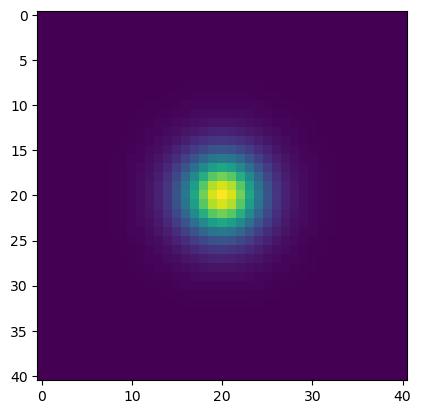

In [8]:
plt.imshow(moffat_kernel)

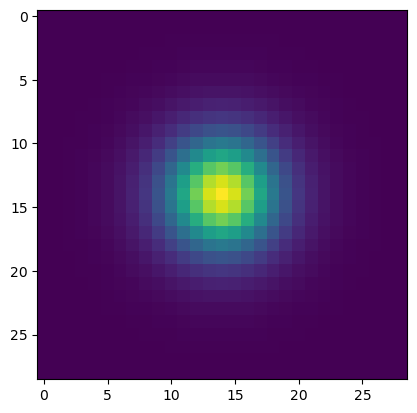

In [11]:
plt.imshow(Moffat2DKernel(9,5))

## Origin image

In [13]:
img_range = 5
image = np.zeros((int(2*img_range/pix_size+1),int(2*img_range/pix_size+1)))

In [14]:
images = np.genfromtxt('../test_-23_point.dat')[1:]
flux = 3
x_img = images[:,0]
y_img = images[:,1]
magnification= np.abs(images[:,2])
x_pix = 50+np.round(x_img/pix_size).astype(int)
y_pix = 50+np.round(y_img/pix_size).astype(int)

In [15]:
for i in range(len(x_pix)):
    image[y_pix[i],x_pix[i]]  = flux*magnification[i]

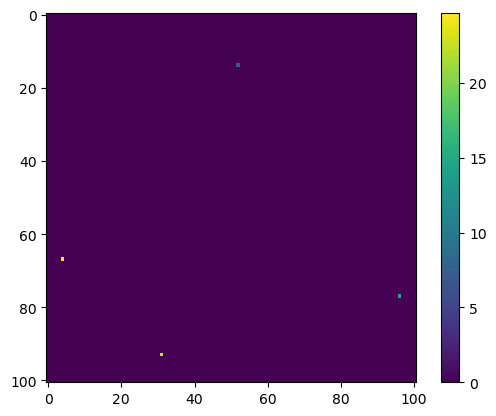

In [16]:
plt.imshow(image)
plt.colorbar()

## Convolved image

In [17]:
start = time.time()
image_conv = convolve2d(image, moffat_kernel, mode='same') 
print(time.time()-start)

0.029746294021606445


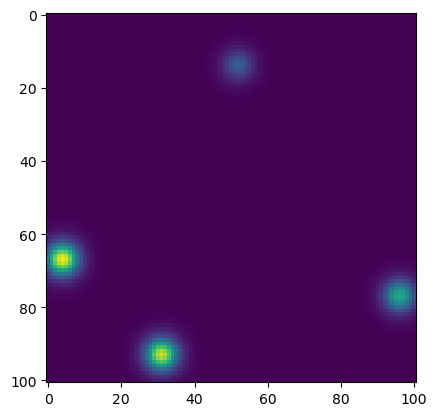

In [18]:
plt.imshow(image_conv)

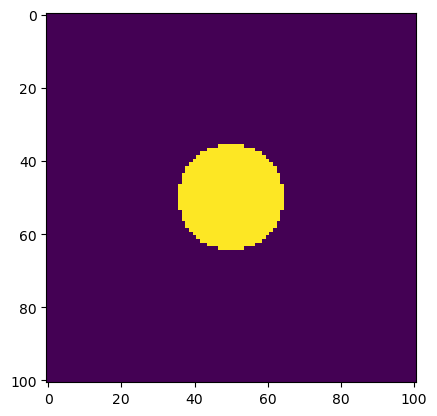

In [25]:
x_mesh_y_mesh  = np.meshgrid(np.linspace(-img_range, img_range, int(2*img_range/pix_size+1)), np.linspace(-img_range, img_range, int(2*img_range/pix_size+1)))
r_mesh = np.sqrt(x_mesh_y_mesh[0]**2+x_mesh_y_mesh[1]**2)
in_fiber = r_mesh < 1.45
plt.imshow(in_fiber)

In [27]:
f'{np.sum(image_conv[in_fiber])} photons in fiber'

'0.09486708239106337 photons in fiber'

## Astropy convolve

In [19]:
Moffat2DKernel(9,5)

In [20]:
start = time.time()
image_conv_astropy = convolve(image, Moffat2DKernel(10,5))
print(time.time()-start)

0.01018977165222168


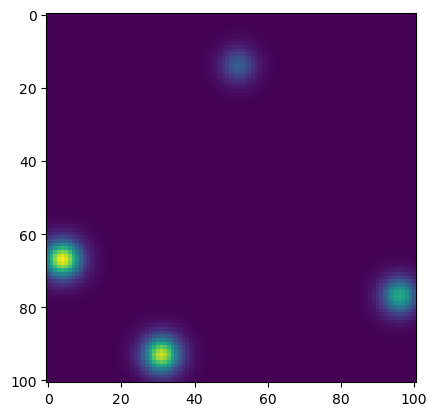

In [21]:
plt.imshow(image_conv_astropy)